- [9.2.4 - Example: Therapeutic touch](#9.2.4---Example:-Therapeutic-touch)   

## Chapter 9 - Hierarchical Models

In [1]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import pymc3 as pmc
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from IPython.display import Image

pd.set_option('display.notebook_repr_html', False)

%matplotlib inline
plt.style.use('seaborn-white')

### 9.2.4 - Example: Therapeutic touch

In [2]:
df = pd.read_csv('data/TherapeuticTouchData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 2 columns):
y    280 non-null int64
s    280 non-null object
dtypes: int64(1), object(1)
memory usage: 4.5+ KB


#### Figure 9.9

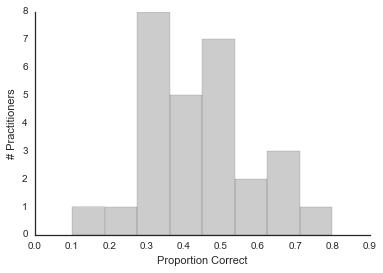

In [3]:
df_proportions = df.groupby('s')['y'].apply(lambda x: x.sum()/len(x))

ax = sns.distplot(df_proportions, bins=8, kde=False, color='gray')
ax.set(xlabel='Proportion Correct', ylabel='# Practitioners')
sns.despine(ax=ax);

#### Model (Kruschke, 2014)

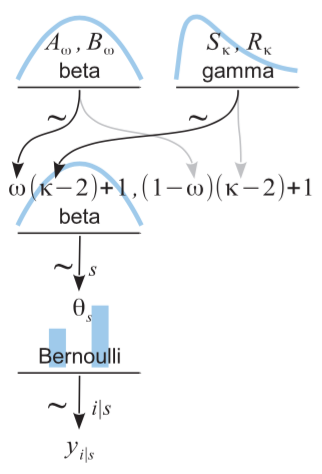

In [4]:
Image('images/fig9_7.png', width=250)

In [5]:
le = preprocessing.LabelEncoder()
practitioner_idx = le.fit_transform(df.s)

practitioner_codes = df.s.unique()
n_practitioners = len(practitioner_codes)

with pmc.Model() as hierarchical_model:
    omega = pmc.Beta('omega', 1, 1)
    kappa = pmc.Gamma('kappa', 0.01, 0.01)+2

    theta = pmc.Beta('theta', omega*(kappa-2)+1, (1-omega)*(kappa-2)+1, shape=n_practitioners)
    
    y = pmc.Bernoulli('y', theta[practitioner_idx], observed=df.y)    

Applied logodds-transform to omega and added transformed omega_logodds to model.
Applied log-transform to kappa and added transformed kappa_log to model.
Applied logodds-transform to theta and added transformed theta_logodds to model.


In [6]:
with hierarchical_model:
    start = pmc.find_MAP()
    step = pmc.NUTS(state=start)
        
    trace= pmc.sample(20000, step, tune=100, start=start)    

 [-----------------100%-----------------] 20000 of 20000 complete in 135.5 sec

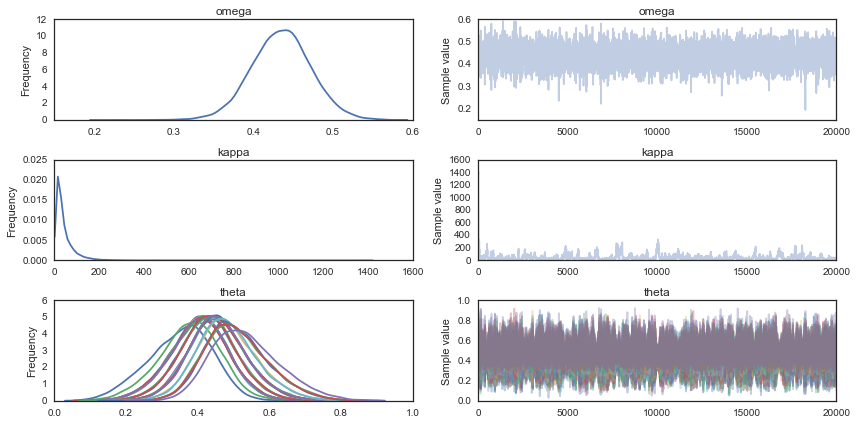

In [7]:
pmc.traceplot(trace);

In [8]:
pmc.df_summary(trace)

                mean         sd  mc_error   hpd_2.5    hpd_97.5
omega       0.434989   0.037684  0.000453  0.360140    0.507864
kappa      42.972905  52.363557  2.701827  2.113419  125.367666
theta__0    0.350610   0.090358  0.002520  0.164771    0.512325
theta__1    0.377036   0.085612  0.001803  0.198877    0.537737
theta__2    0.404208   0.084554  0.001093  0.235379    0.570931
theta__3    0.403770   0.081965  0.001118  0.239328    0.563915
theta__4    0.403964   0.082652  0.001100  0.235049    0.564425
theta__5    0.403376   0.082710  0.001127  0.235167    0.564566
theta__6    0.403642   0.083030  0.001070  0.236151    0.564289
theta__7    0.403302   0.083245  0.001228  0.226847    0.556585
theta__8    0.403380   0.084265  0.001157  0.235039    0.568574
theta__9    0.403755   0.083088  0.001125  0.230289    0.561483
theta__10   0.429190   0.082540  0.000678  0.260704    0.590182
theta__11   0.430183   0.082811  0.000660  0.270874    0.599196
theta__12   0.429603   0.082514  0.00060

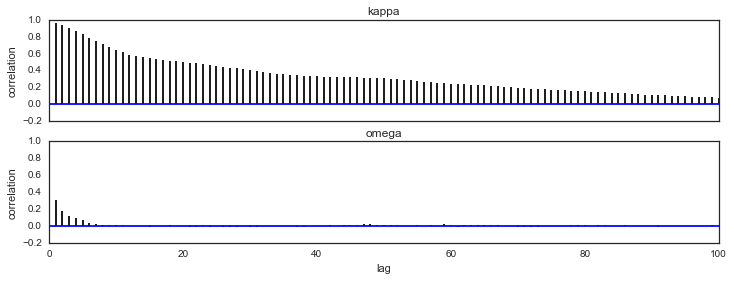

In [9]:
pmc.autocorrplot(trace, varnames=['kappa', 'omega']);

#### Posterior distributions kappa & omega

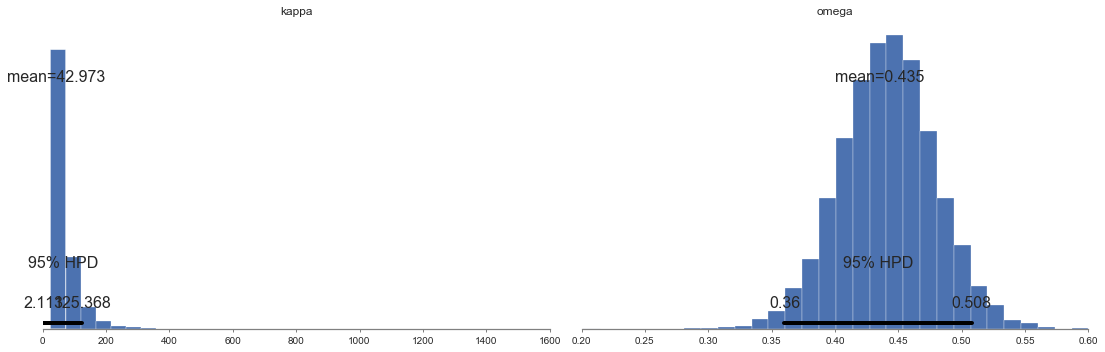

In [10]:
pmc.plot_posterior(trace, varnames=['kappa', 'omega'], point_estimate='mean', figsize=(15,5));

#### Posterior distributions theta0, theta13, theta27

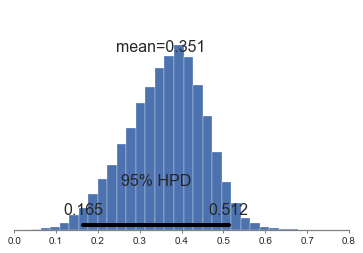

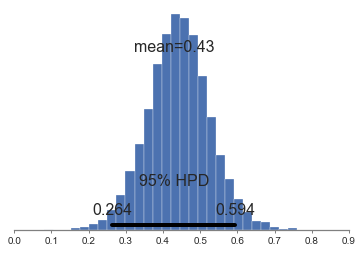

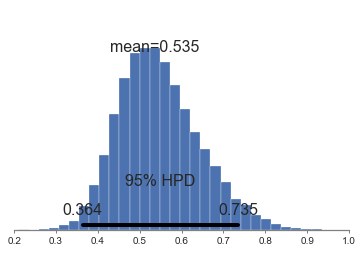

In [11]:
for i in [0,13,27]:
    pmc.plot_posterior(trace['theta'][:,i]);

#### Marginal posterior distributions (Kruschke, 2014)

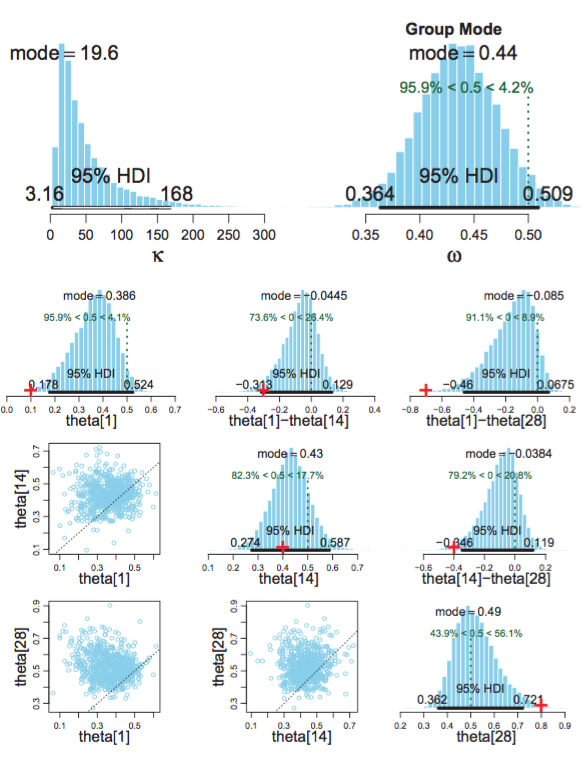

In [12]:
Image('images/fig9_10.png')